## Univariate Polynomial Regression Model for United States Carbon Emission

## Understanding the Data

**`co2_emission.csv`** contains model-specific estimated CO2 emission ratings for each country.

-   **Entity** e.g. Africa
-   **Code** e.g. GBR
-   **Year** e.g. 2014
-   **Annual CO₂ emissions** e.g. 36.2b metric tons (tonnes)

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Creating the dataframe

In [89]:
df = pd.read_csv("co2_emission.csv")
df.head(10)

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
5,Afghanistan,AFG,1954,106256.0
6,Afghanistan,AFG,1955,153888.0
7,Afghanistan,AFG,1956,183200.0
8,Afghanistan,AFG,1957,293120.0
9,Afghanistan,AFG,1958,329760.0


### Modifying dataframe

In [90]:
cdf = df[['Entity', 'Year', 'Annual CO₂ emissions (tonnes )']]
cdf = cdf[cdf['Entity'] == 'United States']
cdf.columns = ['Country', 'Year', 'Emissions']
cdf = cdf[cdf['Emissions'] > 0]
cdf.head(10)

,Country,Year,Emissions
19710,United States,1800,252816.0
19711,United States,1801,267472.0
19712,United States,1802,289456.0
19713,United States,1803,296784.0
19714,United States,1804,333424.0
19715,United States,1805,340752.0
19716,United States,1806,333424.0
19717,United States,1807,377392.0
19718,United States,1808,392048.0
19719,United States,1809,403040.0


## Visualizing Dataset

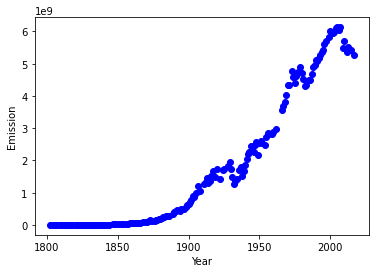

In [91]:
plt.scatter(train.Year, train.Emissions,  color='blue')
plt.xlabel("Year")
plt.ylabel("Emission")
plt.show()

## Create Testing and Training datasets

In [92]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [98]:
x_train = np.asanyarray(train[['Year']])
y_train = np.asanyarray(train[['Emissions']])

x_test = np.asanyarray(test[['Year']])
y_test = np.asanyarray(test[['Emissions']])

### Fitting the Exponential Model
We create a function that the model will fit parameters on 

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=6)
x_train_poly = poly.fit_transform(x_train)
#x_train_poly

In [95]:
clf = linear_model.LinearRegression()
y_train = clf.fit(x_train_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  8.12678291e+02  4.58926811e+01  3.28390053e+04
  -3.89589436e+01  1.64161674e-02 -2.39912545e-06]]
Intercept:  [-1.11370012e+13]


Text(0, 0.5, 'Emission')

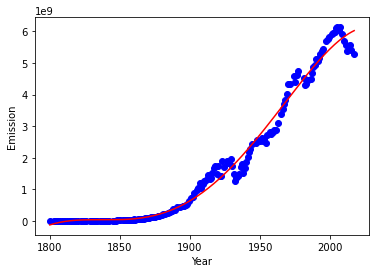

In [96]:
plt.scatter(train.Year, train.Emissions,  color='blue')
fit = []
for x in x_train_poly:
    fit.append(clf.intercept_[0]*x[0]+ clf.coef_[0][1]*x[1]+ clf.coef_[0][2]*x[2] + clf.coef_[0][3]*x[3] + clf.coef_[0][4]*x[4] + clf.coef_[0][5]*x[5] + clf.coef_[0][6]*x[6])
plt.plot(x_train, fit, '-r' )
plt.xlabel("Year")
plt.ylabel("Emission")

### Error Analysis
    When interpreting mean absolute error and residual sum of squares, for this model its important to notice the scale of the y values. The Co2 emissions are in billions so the errors are huge however when taking into account the large numbers the error is much smaller. 

In [108]:
from sklearn.metrics import r2_score

x_test_poly = poly.fit_transform(x_test)
test_y_ = clf.predict(x_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,test_y_ ))

Mean absolute error: 203003310.48
Residual sum of squares (MSE): 86826903753254304.00
R2-score: 0.98


### Examining the Fit With A Different Approach
A polynomial to the 2nd degree fits most of the curve relatively well however the drop down after the 2000s is unaccounted for thus, this model is accurate pre 2000s. Although it is nowhere near guarenteed that the United States would continue this down trend of carbon emissions it's a feasible assumption to make. 

In [110]:
x_train = np.asanyarray(train['Year'])
y_train = np.asanyarray(train['Emissions'])
coefs = np.polyfit(x_train, y_train, 6)

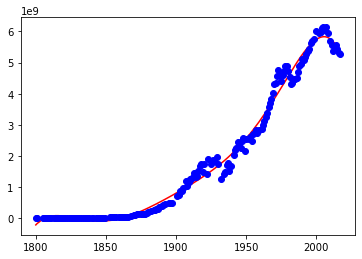

In [171]:
plt.plot(x_train, np.polyval(coefs, x_train), color="red")
plt.plot(x_train, y_train, "o", color="blue")